In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [178]:
finance_data = pd.read_csv('Financials.csv')
finance_data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [179]:
# Preprocessing
finance_data.columns = [s.strip() for s in finance_data.columns] # gets rid of white spaces in column labels
finance_data['Profit'] = [s.strip() for s in finance_data['Profit']]
finance_data = finance_data.replace({'\$': ''}, regex=True) #
finance_data = finance_data.replace({'\,': ''}, regex=True) # cleaning up data
finance_data = finance_data.replace({'\-': '0'}, regex=True) #
finance_data = finance_data.replace({'\(': ''}, regex=True) #
finance_data = finance_data.replace({'\)': ''}, regex=True) #

finance_data = finance_data.drop('Date', axis=1)

finance_data['Units Sold'] = pd.to_numeric(finance_data['Units Sold'])
finance_data['Manufacturing Price'] = pd.to_numeric(finance_data['Manufacturing Price'])
finance_data['Sale Price'] = pd.to_numeric(finance_data['Sale Price'])
finance_data['Gross Sales'] = pd.to_numeric(finance_data['Gross Sales'])
finance_data['Discounts'] = pd.to_numeric(finance_data['Discounts'])
finance_data['Sales'] = pd.to_numeric(finance_data['Sales'])
finance_data['COGS'] = pd.to_numeric(finance_data['COGS'])
finance_data['Profit'] = pd.to_numeric(finance_data['Profit'])
finance_data = finance_data.convert_dtypes()




finance_data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.0,631125.0,618750.0,12375.0,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.0,139230.0,136500.0,2730.0,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.4,8139.6,6840.0,1299.6,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,4,April,2014


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def _draw_as_table(df, pagesize):
    alternating_colors = [['white'] * len(df.columns), ['lightgray'] * len(df.columns)] * len(df)
    alternating_colors = alternating_colors[:len(df)]
    fig, ax = plt.subplots(figsize=pagesize)
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=df.values,
                        rowLabels=df.index,
                        colLabels=df.columns,
                        rowColours=['lightblue']*len(df),
                        colColours=['lightblue']*len(df.columns),
                        cellColours=alternating_colors,
                        loc='center')
    return fig
  

def dataframe_to_pdf(df, filename, numpages=(1, 1), pagesize=(11, 8.5)):
  with PdfPages(filename) as pdf:
    nh, nv = numpages
    rows_per_page = len(df) // nh
    cols_per_page = len(df.columns) // nv
    for i in range(0, nh):
        for j in range(0, nv):
            page = df.iloc[(i*rows_per_page):min((i+1)*rows_per_page, len(df)),
                           (j*cols_per_page):min((j+1)*cols_per_page, len(df.columns))]
            fig = _draw_as_table(page, pagesize)
            if nh > 1 or nv > 1:
                # Add a part/page number at bottom-center of page
                fig.text(0.5, 0.5/pagesize[0],
                         "Part-{}x{}: Page-{}".format(i+1, j+1, i*nv + j + 1),
                         ha='center', fontsize=8)
            pdf.savefig(fig, bbox_inches='tight')
            
            plt.close()

dataframe_to_pdf(finance_data, "finance_clean.pdf")

<BarContainer object of 6 artists>

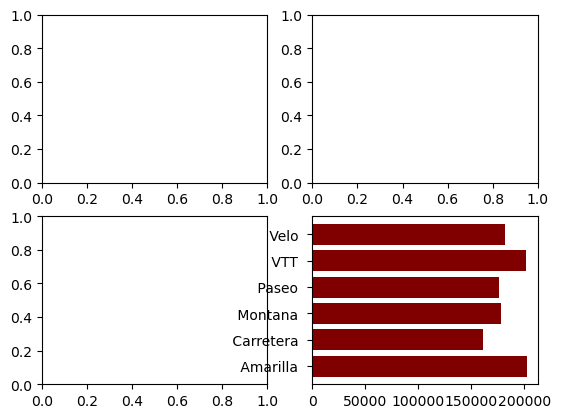

In [168]:
# Look at performance of products

fig, ax = plt.subplots(2,2)

product_performance = finance_data.groupby('Product').mean()
product_performance = product_performance.drop(['Month Number', 'Year'], axis=1)
product_performance

plt.barh(y=product_performance.index, width=product_performance['Gross Sales'], color='maroon')